In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [8]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)
print(means[0])
print(sigmas[0])
#print(X)

[array([ 0.69872366,  0.75176984]), array([ 0.25997411,  0.14504062])]
[array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]]), array([[ 0.01764816,  0.        ],
       [ 0.        ,  0.06360523]])]
[ 0.69872366  0.75176984]
[[ 0.01764816  0.        ]
 [ 0.          0.06360523]]


Solution
===

In [25]:
#test

sigma = sigmas[0]
print(sigma)
inv = np.linalg.inv(sigma)
print(inv)

X.shape[1]
result = np.zeros(X.shape[0])
print(result)

[[ 0.01764816  0.        ]
 [ 0.          0.06360523]]
[[ 56.66312761   0.        ]
 [  0.          15.72197649]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [46]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    result = np.copy(X)
    def compute(x, mean, sigma):
        # exponential left part
        diff = x - mean
        diff_transpose = np.matrix.transpose(diff)
        sigma_inv = np.linalg.inv(sigma)
        exp = 0.5 * np.dot(np.dot(diff_transpose, sigma_inv), diff)
        exp = np.exp(exp)

        # fractional right part
        sigma_det = np.linalg.det(sigma)
        inv = np.power(2 * np.pi, X.shape[1] * 0.5) * np.power(sigma_det, 0.5)
        inv = 1 / inv
        x = (inv*exp)
        return x
    
    result = [compute(x, mean, sigma) for x in X]

    return result
    

In [86]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping
print(log_ps)


[[7.9420205940676851, 14.065075621256824, 1244158.7971712525, 132.6687484434002, 57.525928719064488, 827.32249847825142, 6.2702457712128554, 312.3205646104235, 69967.34697909659, 13118.017606249809, 13.220805473998277, 106.82047120373606, 9.319178403371092, 5.7413113822238291, 39.065996829250615, 5.2014940375414325, 35510.23368253329, 9.820280901580988, 359.15476888965605, 4685.3533673826814, 7.3993299584587033, 775.77224901756961, 1462.3816304156871, 20263.968620748205, 121.80461994863462, 12.423543768288351, 5.8170602758814738, 7.2016953300096622, 5.3570913439525656, 61.382122271569862, 794.84343892227866, 5.4538179176270738, 11.104236392566204, 446.87682320105773, 278.4008336657779, 7.2375866182681134, 15.404253028604641, 168.45559287629894, 11.676692271215563, 1064.5297820496862, 785484.52625681669, 6499.7371849072551, 3183.3171823449848, 99.372125787725395, 2247258.6419769842, 5.5250326493588373, 27844912.602728169, 21.03250297797528, 25.278965870055195, 13.026191222490802, 21.508

In [78]:
means[1]
cols.ravel()

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [85]:
# without loop but with indices
rows, cols = np.indices((X.shape[0], len(means)))
ext_X = X[rows.ravel()]
print(ext_X)
np_means = np.array(means)
ext_means = np_means[cols.ravel()]

ext_sigmas = np.array(sigmas)[cols.ravel()]

[[ 0.5881308   0.89771373]
 [ 0.5881308   0.89771373]
 [ 0.89153073  0.81583748]
 [ 0.89153073  0.81583748]
 [ 0.03588959  0.69175758]
 [ 0.03588959  0.69175758]
 [ 0.37868094  0.51851095]
 [ 0.37868094  0.51851095]
 [ 0.65795147  0.19385022]
 [ 0.65795147  0.19385022]
 [ 0.2723164   0.71860593]
 [ 0.2723164   0.71860593]
 [ 0.78300361  0.85032764]
 [ 0.78300361  0.85032764]
 [ 0.77524489  0.03666431]
 [ 0.77524489  0.03666431]
 [ 0.11669374  0.7512807 ]
 [ 0.11669374  0.7512807 ]
 [ 0.23921822  0.25480601]
 [ 0.23921822  0.25480601]
 [ 0.85762553  0.94977903]
 [ 0.85762553  0.94977903]
 [ 0.56168686  0.17878052]
 [ 0.56168686  0.17878052]
 [ 0.77025193  0.49238104]
 [ 0.77025193  0.49238104]
 [ 0.63125307  0.83949792]
 [ 0.63125307  0.83949792]
 [ 0.4610394   0.49794007]
 [ 0.4610394   0.49794007]
 [ 0.67941112  0.65078591]
 [ 0.67941112  0.65078591]
 [ 0.26879524  0.06732467]
 [ 0.26879524  0.06732467]
 [ 0.77144514  0.48098413]
 [ 0.77144514  0.48098413]
 [ 0.32920641  0.51064106]
 

In [83]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


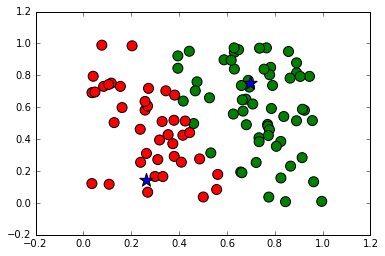

In [84]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)